# Лабораторная работа №5
Левицкий Валентин А-13-22

Вариант №23

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 5.1


Дана функция $f(x)$. Приблизить функцию методом интерполяции,
используя многочлен Лагранжа. Степень многочлена $N$ подобрать экспериментально
таким образом, чтобы максимальная величина погрешности на отрезке $[a, b]$ не превышала заданной величины $\varepsilon$.
Построить графики функции, многочлена и график погрешностей.

$
f(x) = \sqrt{x - 2},\ x \in [2.2, 4];
$

$\varepsilon = 10^{-6}. $

Составить таблицу значений функции в $n+1$
точке отрезка, то есть задать массивы $x$ и
$y$ исходных данных.

In [12]:
f = lambda x: np.sqrt(x - 2)
a, b = 2+0.2, 4
n = 20

X_train = np.linspace(a, b, n+1)
Y_train = f(X_train)

Составить подпрограмму, выполняющую вычисление функции в произвольной точке $t$
отрезка $[a, b]$
с помощью интерполяционного многочлена Лагранжа $L(t)$.

In [13]:
def lagrange_polynomial(x, y):
    n = x.size
    delta_x = np.zeros((n, n))
    for i in range(n):
        for j in range(i):
            delta_x[i, j] = x[i] - x[j]
            delta_x[j, i] = -delta_x[i, j]

    def L(t):
        result = 0
        for i in range(n):
            # print(y[i])
            li = y[i]
            for j in range(n):
                if j == i:
                    continue
                li *= (t - x[j]) / delta_x[i, j]
            result += li
        return result
    return L

L = lagrange_polynomial(X_train, Y_train)

Построить график функции погрешности $RL(t)=|f (t)−L(t)|$ на отрезке интерполяции
и по графику определить максимальную величину полученной погрешности
приближения. Если точность не достигнута, то увеличить число узлов интерполяции.
Найти значение $n=N$, при котором точность достигается.

In [14]:
X = np.linspace(a, b, 1000)
Y_lag = np.array([L(x) for x in X])
Y = f(X)

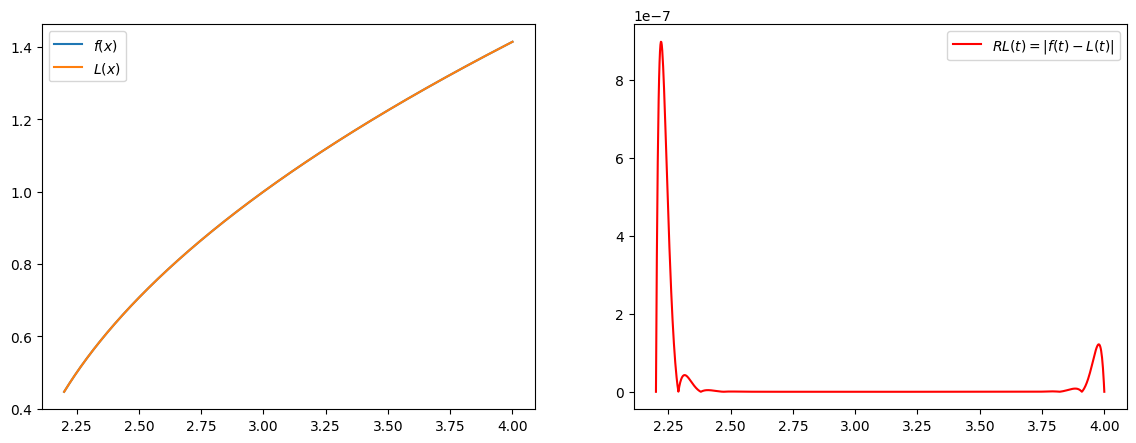

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(X, Y, label='$f(x)$')
ax1.plot(X, Y_lag, label='$L(x)$')
ax1.legend()
ax2.plot(X, np.abs(Y - Y_lag), color='red', label='$RL(t) = |f(t) - L(t)|$')
ax2.legend()

Отрезок $[a, b]$ был выбран таким образом, чтобы функция на нем поддавалась интерполяции с помощью многочлена Лагранжа с погрешностью $\varepsilon$ (была достаточно гладкой)

## Задача 5.3
В таблице приведены данные о численности населения Южной Африки по годам с 1950 - 2000 г.г.
| Год  | Население, млн. чел. |
| ---- | --------------------:|
| 1950 |                  155 |
| 1960 |                  210 |
| 1970 |                  285 |
| 1980 |                  375 |
| 1990 |                  510 |
| 2000 |                  650 |
| 2010 |                  770 | 
| 2020 |                 1135 |
|      |                      |

На основе этих данных построить наилучший многочлен по МНК. Найти численность населения страны в 2023
году и сравнить полученное значение с актуальным значением.

In [78]:
def Pm(a, x):
    return np.sum([a[i] * x ** i for i in range(len(a))], axis= 0)

def LSQ(x, y):
    n = len(x)
    A = np.zeros((n, n))
    z = np.zeros((n,))
    for d in range(2 * n - 1):
        e = sum(x**d)
        for i in range(max(0, d - n + 1), min(n, d + 1)):
            A[d - i, i] = e
    for d in range(n):
        z[d] = sum(y * x ** d)
    return np.linalg.solve(A, z)
X_data = np.array([50, 60, 70, 80, 90, 100, 110, 120]) + 1900
X_train = (X - 1950) / 10.0
Y_disp = np.array([155, 210, 285, 375, 510, 650, 770, 1135])
Y_data = Y_disp * 10 ** 6

a = LSQ(X_train, Y_data)
X_test = np.linspace(0, 8, 100)
X_disp = np.linspace(1950, 2030, 100)
Y_test = Pm(a, X_test)
y23_predict = round(Pm(a, 7.3) / 10**6)
print("Прогноз на 2023 год по имеющимся данным:", y23_predict, " млн. чел.")

Прогноз на 2023 год по имеющимся данным: 1415  млн. чел.


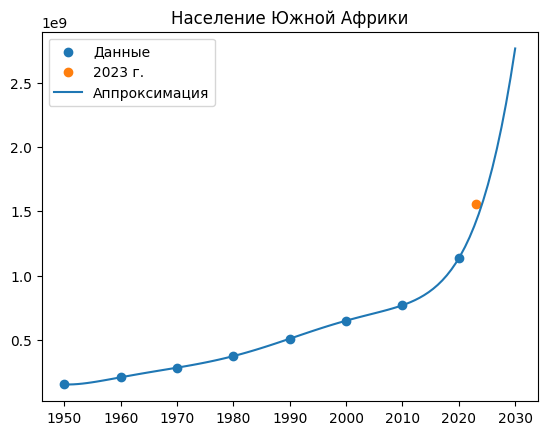

In [79]:
plt.scatter(X_data, Y_data, label="Данные")
plt.scatter([2023], [1560_000_000], label="2023 г.")
plt.plot(X_disp, Y_test, label="Аппроксимация")
plt.title("Население Южной Африки")
plt.legend()

Решить ту же задачу на основе интерполяционного многочлена. То есть построить
интерполяционный многочлен по значениям с 1950-2020 г.г и выполнить прогноз на 2023
год. Сравнить с актуальными данными.